In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Bikes

The bike datasets in this section is big, and could lead to kernel crashes.

In [4]:
trip = Table.read_table('trip.csv')
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


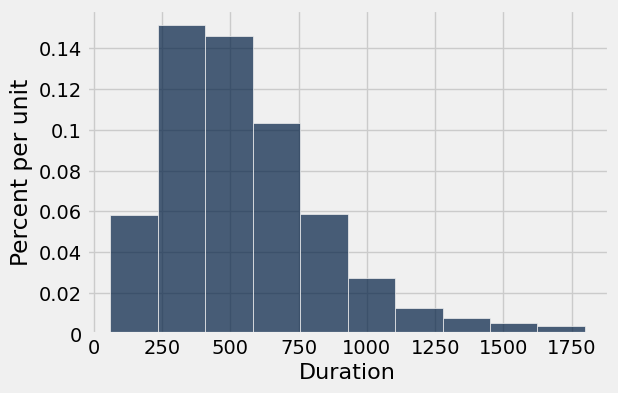

In [5]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

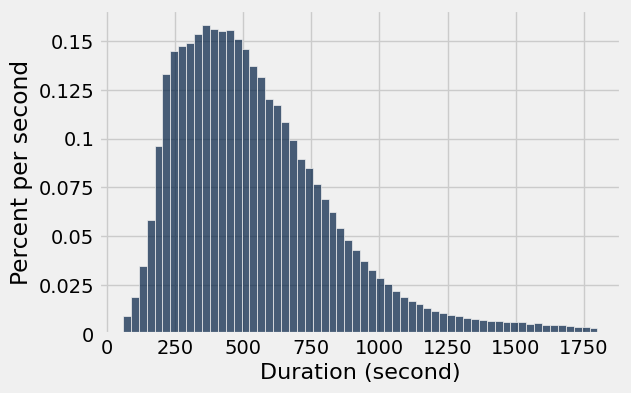

In [6]:
commute.hist('Duration', bins=60, unit='second')

In [ ]:
# Percent of people who have a ride duration between 500 and 250 seconds
(500-250) * 0.15 

In [7]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [8]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [10]:
shortest = duration.group(['Start Station', 'End Station'], min).relabeled('Duration min', 'Minimum Duration')
shortest

Start Station,End Station,Minimum Duration
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [11]:
from_cc = shortest.where('Start Station', are.containing('Civic Center BART')).sort('Minimum Duration')
from_cc

Start Station,End Station,Minimum Duration
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


## Maps, again

In [12]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [13]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [14]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=15)

/home/shaolin/Documents/Teaching/2023/cs2065/venv/lib/python3.9/site-packages/datascience/maps.py:800: FutureWarning: The 'radius' argument is deprecated. Please use 'area' instead.
  warnings.warn("The 'radius' argument is deprecated. Please use 'area' instead.", FutureWarning)


## Extra practice

### Write a Python expression below each of the following descriptions that computes its value. You may use more than one line.

In [15]:
trip

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [21]:
# The name of the station where the most rentals ended (assume no ties).
trip.select('End Station').group('End Station').sort('count', descending=True).column('End Station').item(0)


'San Francisco Caltrain (Townsend at 4th)'

In [24]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.
trip.select('End Station','Duration').group('End Station', np.average).where('Duration average',are.above(600))

End Station,Duration average
2nd at Folsom,4449.27
2nd at Townsend,738.881
5th at Howard,754.173
Adobe on Almaden,1186.46
Arena Green / SAP Center,1338.58
Beale at Market,735.424
Broadway St at Battery St,725.888
California Ave Caltrain Station,5301.09
Castro Street and El Camino Real,2935.32
Civic Center BART (7th at Market),971.157


In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends

In [ ]:
start = trip.select('Start Station').group('Start Station')
start

In [25]:
start = trip.select('Start Station').group('Start Station')
start
end = trip.select('End Station').group('End Station')
end

End Station,count
2nd at Folsom,4727
2nd at South Park,8253
2nd at Townsend,15463
5th at Howard,8147
Adobe on Almaden,490
Arena Green / SAP Center,621
Beale at Market,6330
Broadway St at Battery St,7159
California Ave Caltrain Station,496
Castro Street and El Camino Real,1116


In [34]:
start.join('Start Station', end, 'End Station').relabeled('Start Station', 'Station') \
    .relabeled('count', 'starting at') \
    .relabeled('count_2', 'ending at') \
    .where('starting at', are.above(500)) \
    .where('ending at', are.above(500))

Station,starting at,ending at
2nd at Folsom,7999,4727
2nd at South Park,9469,8253
2nd at Townsend,14026,15463
5th at Howard,7708,8147
Arena Green / SAP Center,647,621
Beale at Market,8359,6330
Broadway St at Battery St,7676,7159
Castro Street and El Camino Real,1230,1116
Civic Center BART (7th at Market),7760,7714
Clay at Battery,5040,5068


In [ ]:
# The name of the station where the most rentals ended (assume no ties).
# First, find end counts
# Then, find the station with the highest end count
trip.group('End').sort('count', descending=True).column(0).item(0)

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.

# First, find the average end time for each station
# Then, keep the ones above 10 minutes
# Then, count them
trip.group('End', np.average).where(2, are.above(10*60)).num_rows

In [ ]:
# The number of stations that have more than 500 starts AND more than 500 ends.

# First, group the trip on starts and ends, separately
# Then, join the two grouped tables
# Then, count the number of rows where the stations' start and end counts are bove 500
start_counts, end_counts = trip.group('Start').relabeled('count', 'Start Count'), trip.group('End').relabeled('count', 'End Count')
start_counts.join('Start', end_counts, 'End').where(
    'Start Count', are.above(500)).where('End Count', are.above(500)).num_rows

## Comparison ##

In [35]:
3 > 1

True

In [36]:
type(3 > 1)

bool

In [37]:
True

True

In [38]:
true

NameError: name 'true' is not defined

In [39]:
3 = 3

SyntaxError: cannot assign to literal (3802935557.py, line 1)

In [40]:
3 == 3.0

True

In [41]:
10 != 2

True

In [43]:
x = 14
y = 3

In [44]:
x > 15

False

In [45]:
12 < x

True

In [46]:
x < 20

True

In [47]:
12 < x < 20

True

In [48]:
10 < x-y < 13

True

In [49]:
x > 13 and y < 3.14159

True

## Comparisons with arrays

In [50]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [56]:
pets == 'rabbit'

array([False, False, False, False, False,  True], dtype=bool)

In [54]:
1 + 1 + 0 + 1 + 0 + 0

3

In [60]:
True + False

1

In [55]:
def equalToRabbit(animal):
    return animal == 'rabbit'
equalToRabbit(pets)

array([False, False, False, False, False,  True], dtype=bool)

In [76]:
def test():
    if '5':
        return 3
    else:
        return 5

In [77]:
test()

3

In [58]:
animals = Table().with_column('Type',pets)
animals

Type
cat
cat
dog
cat
dog
rabbit


In [80]:
sum(make_array(True, True, False, True, False, False))

3

In [79]:
sum(pets == 'dog')

2

In [78]:
np.count_nonzero(pets == 'dog')

2

In [ ]:
x = np.arange(20, 31)

In [ ]:
x > 28


In [ ]:
animals.where(animals.apply(equalToRabbit, 'Type'))

In [ ]:
np.append(pets, pets)


In [ ]:
pets

In [83]:
animals2 = animals.with_column('Age', make_array(1,2,3,4,5,6))
animals2

Type,Age
cat,1
cat,2
dog,3
cat,4
dog,5
rabbit,6


In [87]:
4 % 2 == 0

False

In [89]:
def is_even(num):
    return num % 2 == 0

In [94]:
animals2.where('Age', is_even)

Type,Age
cat,2
cat,4
rabbit,6


## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Random Selection

In [ ]:
mornings = make_array('wake up', 'sleep in')

In [ ]:
np.random.choice(mornings)

In [ ]:
np.random.choice(mornings)

In [ ]:
np.random.choice(mornings)

In [ ]:
np.random.choice(mornings, 7)

In [ ]:
sum(np.random.choice(mornings, 7) == 'wake up')

In [ ]:
sum(np.random.choice(mornings, 7) == 'sleep in')

In [ ]:
morning_week = np.random.choice(mornings, 7)
morning_week

In [ ]:
sum(morning_week == 'wake up')

In [ ]:
sum(morning_week == 'sleep in')

In [ ]:
die_faces = np.arange(1, 7)
die_faces

In [ ]:
np.random.choice(die_faces)

### Conditional Statements

In [ ]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [ ]:
one_round(4, 3)

In [ ]:
one_round(2, 6)

In [ ]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [ ]:
one_round(1, 1)

In [ ]:
one_round(6, 5)

In [ ]:
one_round(7, -1)

In [ ]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [ ]:
simulate_one_round()

### Repeated Betting ###

In [ ]:
results = make_array()
results

In [ ]:
results = np.append(results, simulate_one_round())
results

## `For` Statements

In [ ]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

In [ ]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

In [ ]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

In [ ]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

In [ ]:
len(game_outcomes)

In [ ]:
results = Table().with_column('My winnings', game_outcomes)

In [ ]:
results

In [ ]:
results.group('My winnings').barh('My winnings')

### Another example: simulating heads in 100 coin tosses

In [ ]:
coin = make_array('heads', 'tails')

In [ ]:
sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [ ]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

In [ ]:
outcomes

In [ ]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(25, 75))

## Optional: Advanced `where` ##

In [ ]:
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [ ]:
age

In [ ]:
age.where('Age', are.above_or_equal_to(18))

In [ ]:
voter = ages >= 18

In [ ]:
voter

In [ ]:
age.where(voter)

In [ ]:
is_voter = are.above_or_equal_to(18)

In [ ]:
type(is_voter)

In [ ]:
is_voter(22)

In [ ]:
is_voter(3)

In [ ]:
age.apply(is_voter, 'Age')

In [ ]:
ages >= 18

In [ ]:
voter

In [ ]:
def my_voter_function(x):
    return x >= 18

In [ ]:
age.where('Age', are.above_or_equal_to(18))

In [ ]:
age.where(voter)

In [ ]:
age.where('Age', my_voter_function)

## Probability

In [ ]:
one23 = 3/6
one23

## Monty Hall

In [ ]:
doors = make_array('car', 'first goat', 'second goat')

In [ ]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [ ]:
other_goat('first goat')

In [ ]:
other_goat('wheeler hall')

In [ ]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [ ]:
monty_hall()

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [ ]:
games.append(monty_hall())

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

In [ ]:
games.group('Remaining')

In [ ]:
games.group('Guess')

## Probability ##

In [ ]:
# Discussion Question (a):
# P(Mo and Jo both appear)

In [ ]:
# Discussion Question (b)
# P(neither Mo nor Jo appears)
